# Step 1: **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: **Load the dataset**

In [ ]:
df = pd.read_csv('amazon.csv')

# Step 3: **Display the first few rows to understand the dataset structure**

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1    

# Step 4: **Check for missing values**

In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


# Step 5: **Check data types of each column**

In [ ]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


# Step 6: **Clean numeric columns**

In [ ]:
df['discounted_price'] = pd.to_numeric(df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].astype(str).str.replace('%', ''), errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].astype(str).str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Step 7: **Display summary statistics for numeric columns**

In [ ]:
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
print("\nSummary statistics for numeric columns:")
print(df[numeric_cols].describe())


Summary statistics for numeric columns:
       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.304394   10874.826864            21.635905     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4295.000000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1465.000000  
mean    18270.564505  
std     42729.995315  
min         0.000000  
25%      1173.000000  
50%      5178.000000  
75%     17325.000000  
max    426973.000000  


# **Histograms**


Histograms for numeric variables:


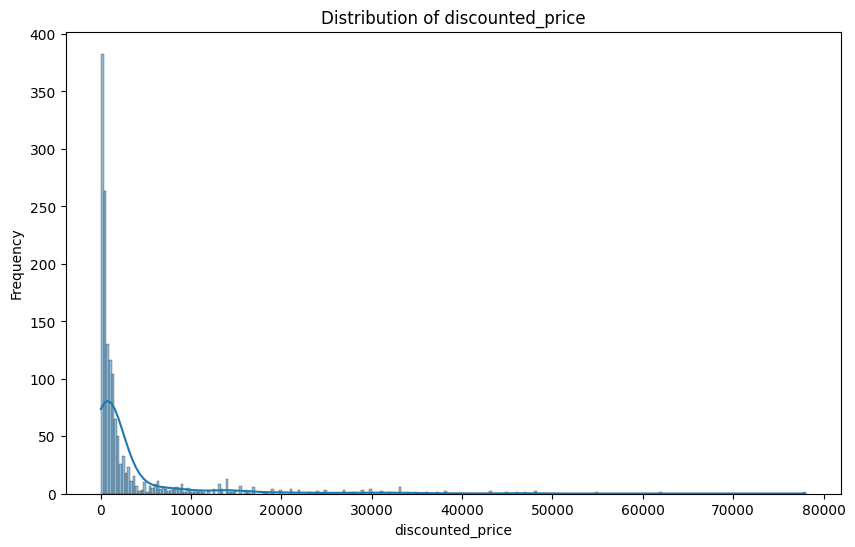

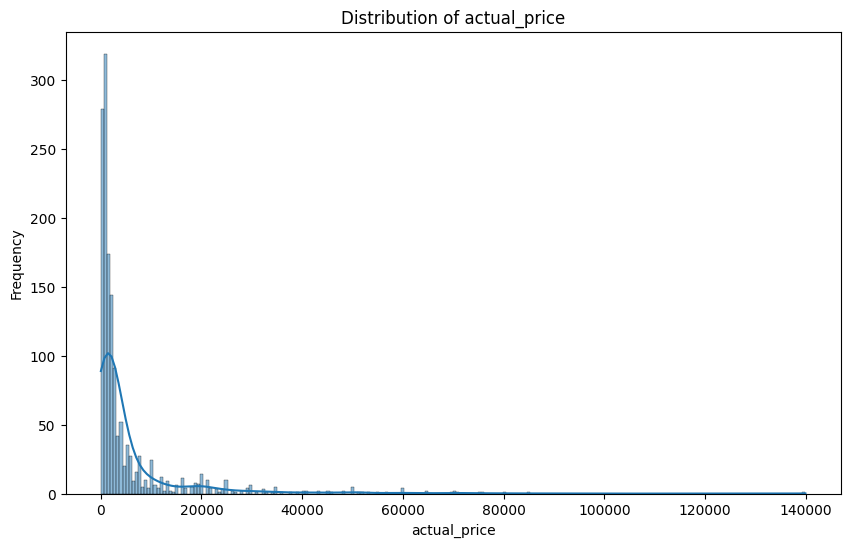

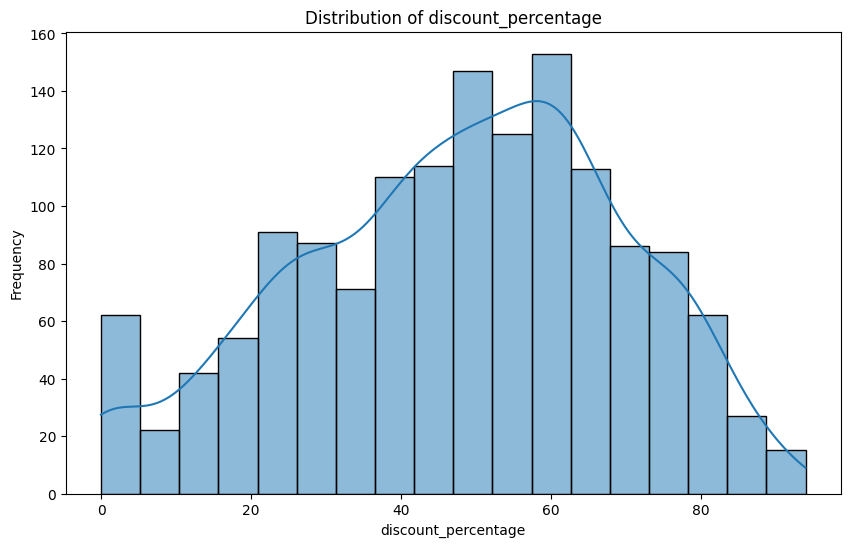

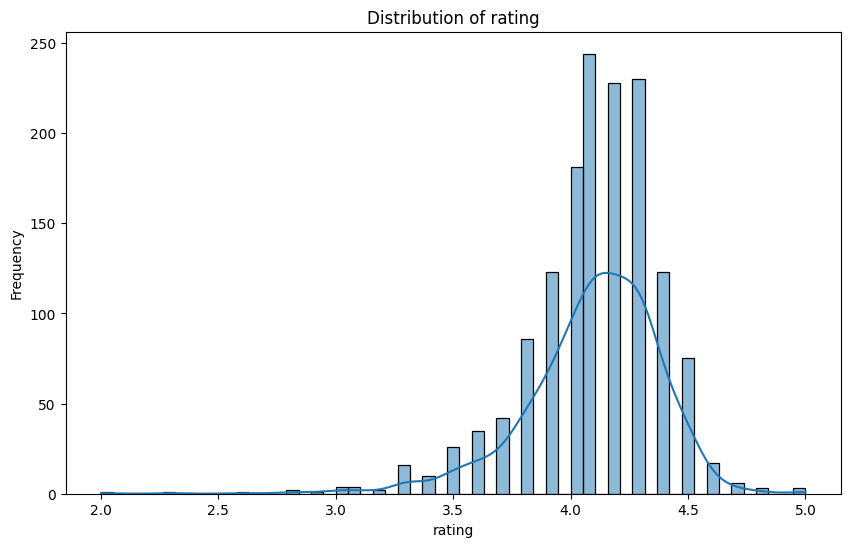

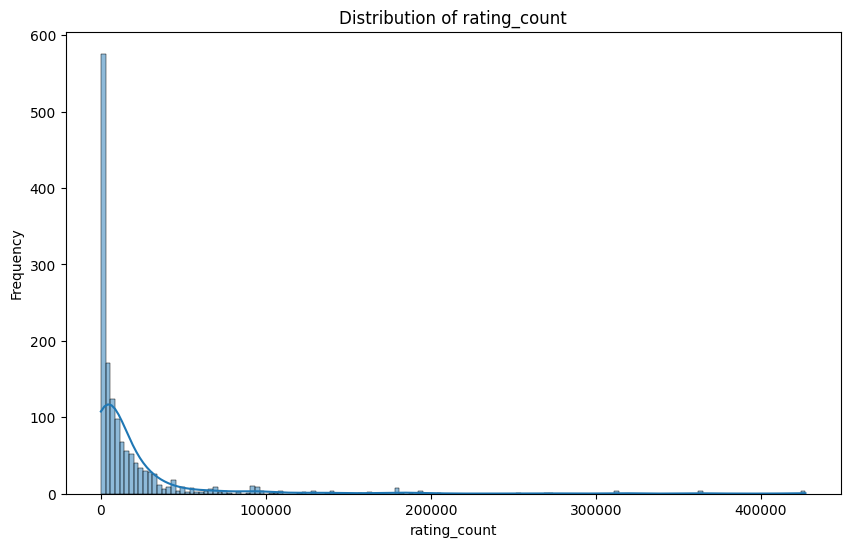

In [ ]:
print("\nHistograms for numeric variables:")
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# **Log-scale histogram for rating_count**

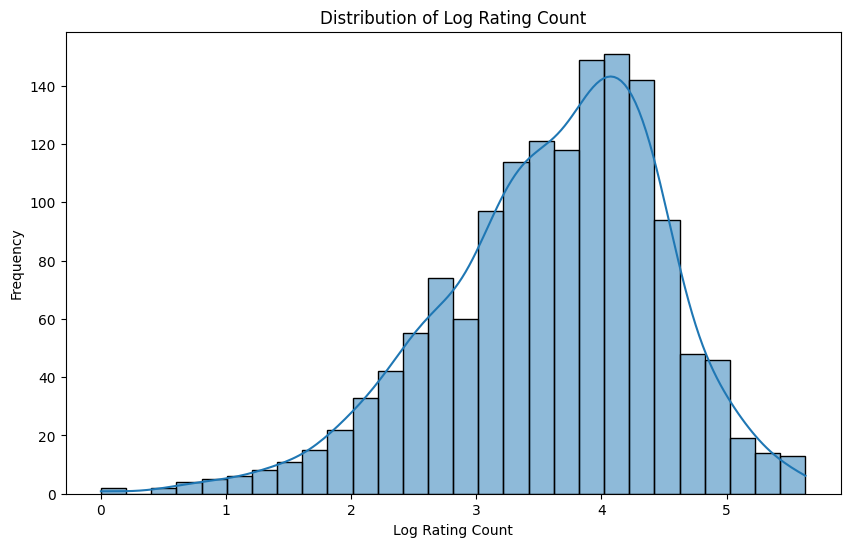

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log10(df['rating_count'] + 1), kde=True)
plt.title('Distribution of Log Rating Count')
plt.xlabel('Log Rating Count')
plt.ylabel('Frequency')
plt.show()

# **Box plots**


Box plots for numeric variables to detect outliers:


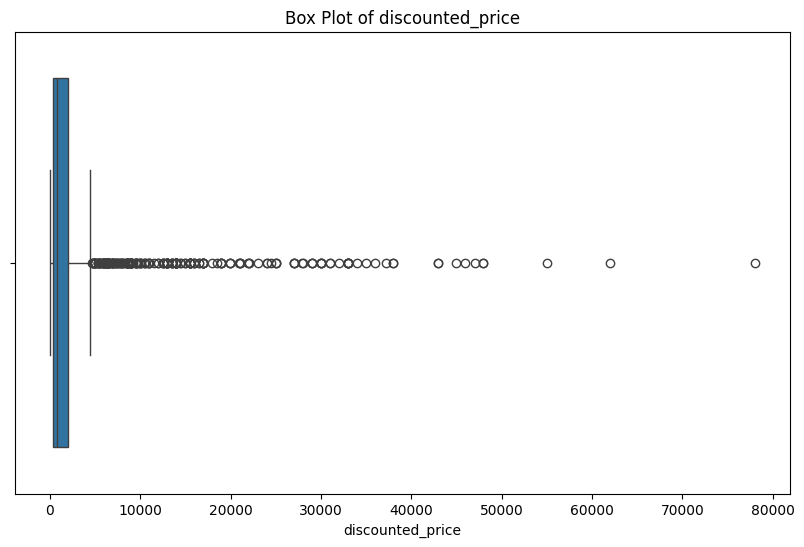

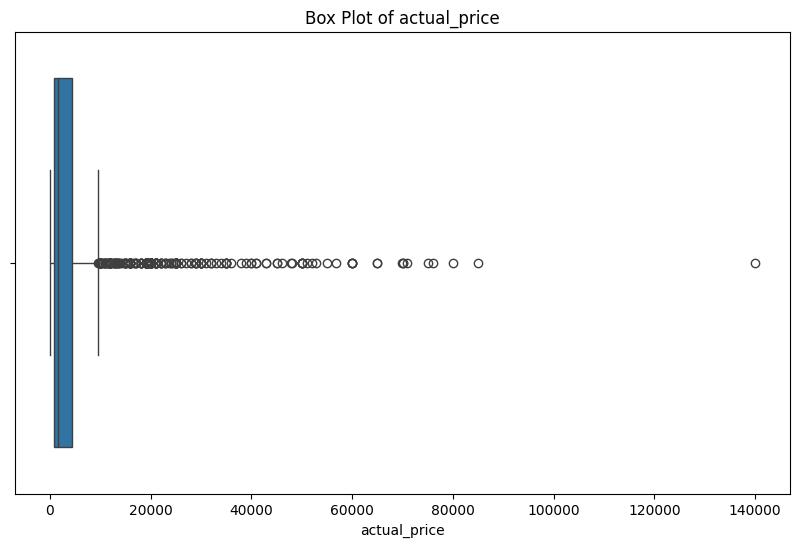

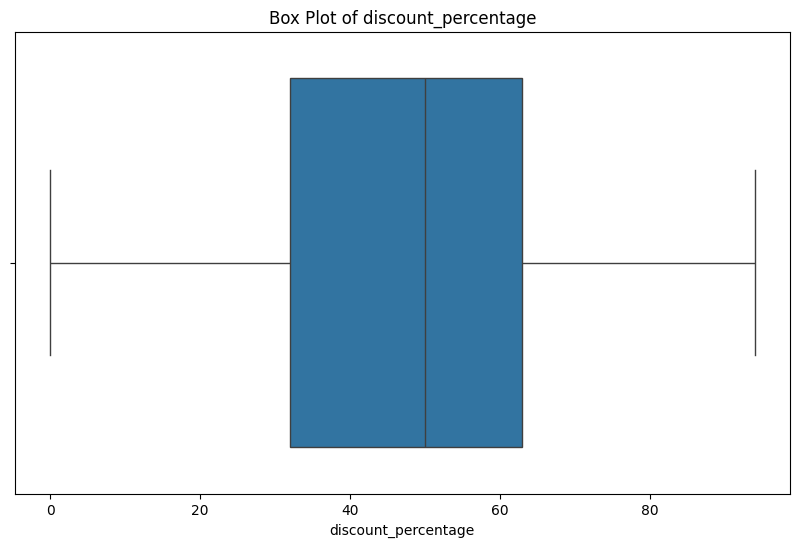

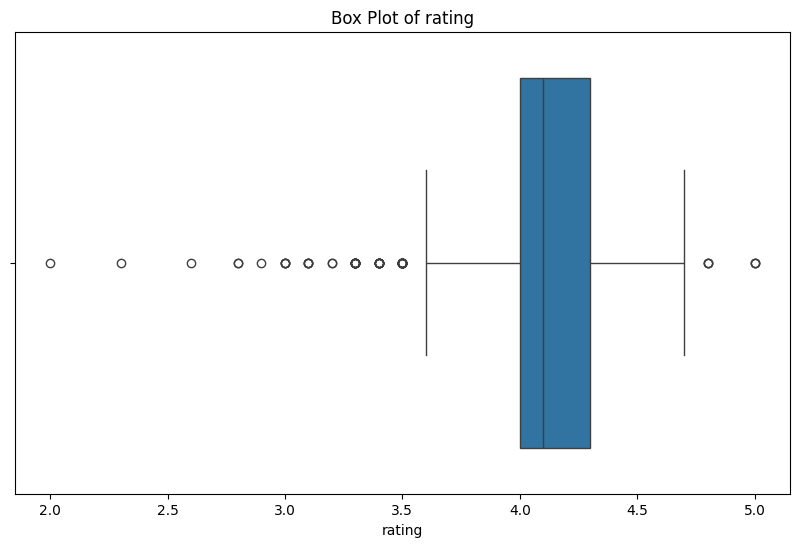

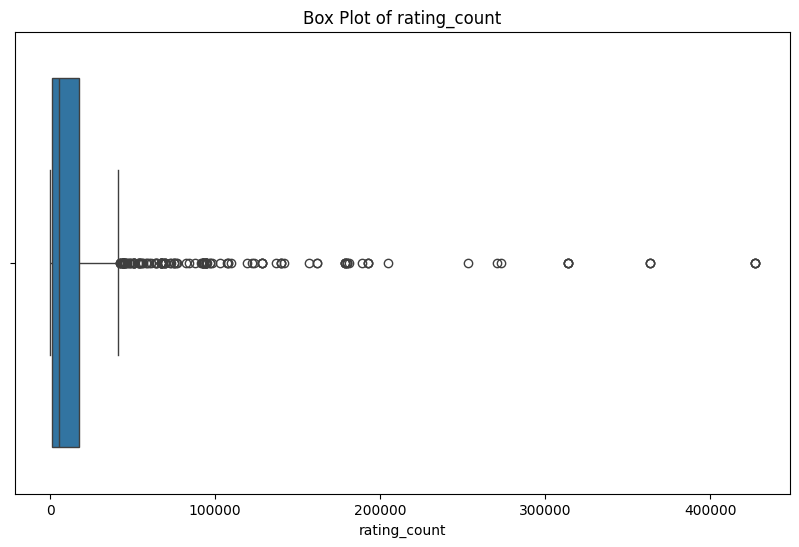

In [ ]:
print("\nBox plots for numeric variables to detect outliers:")
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Correlation matrix


Correlation matrix heatmap for numeric variables:


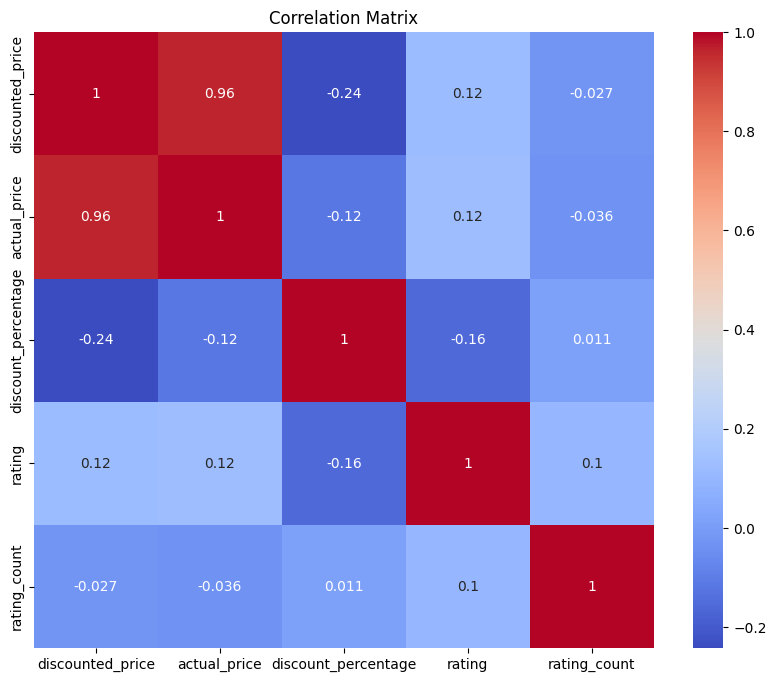

In [ ]:
print("\nCorrelation matrix heatmap for numeric variables:")
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots

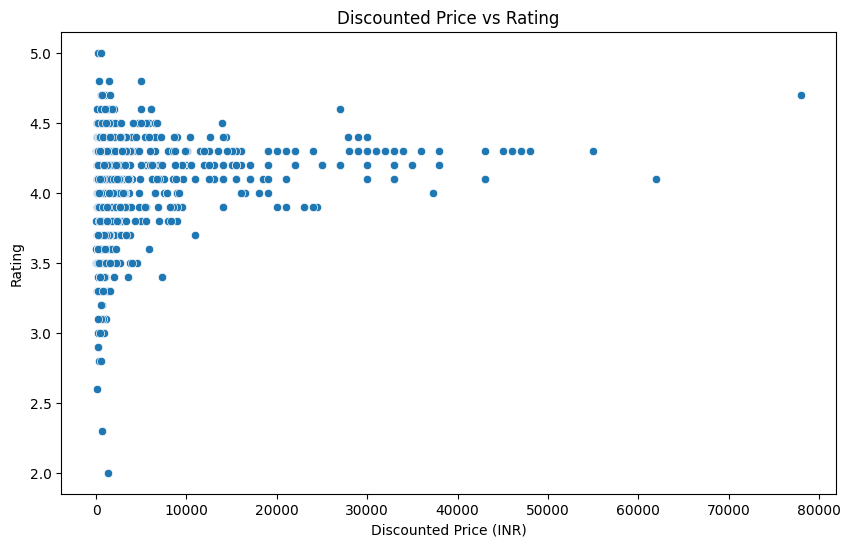

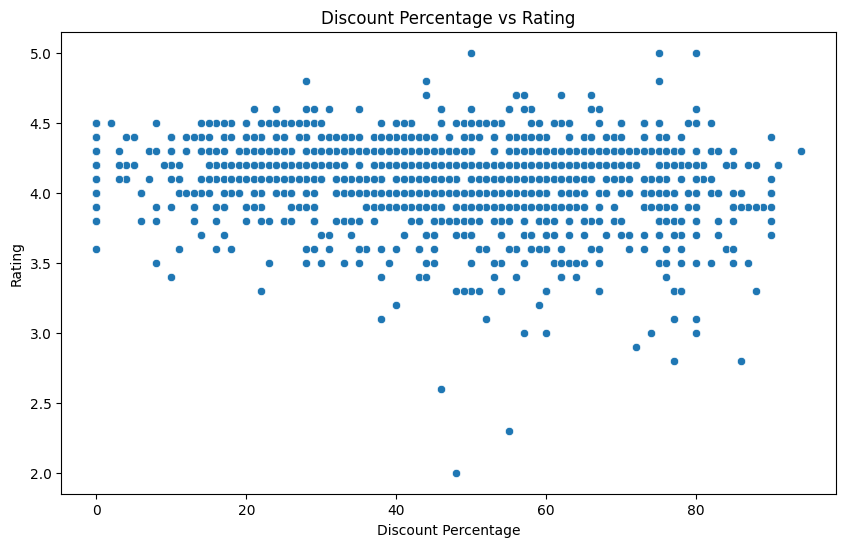

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df.dropna(subset=['discounted_price', 'rating']))
plt.title('Discounted Price vs Rating')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df.dropna(subset=['discount_percentage', 'rating']))
plt.title('Discount Percentage vs Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

# Category analysis


Number of unique main categories: 9


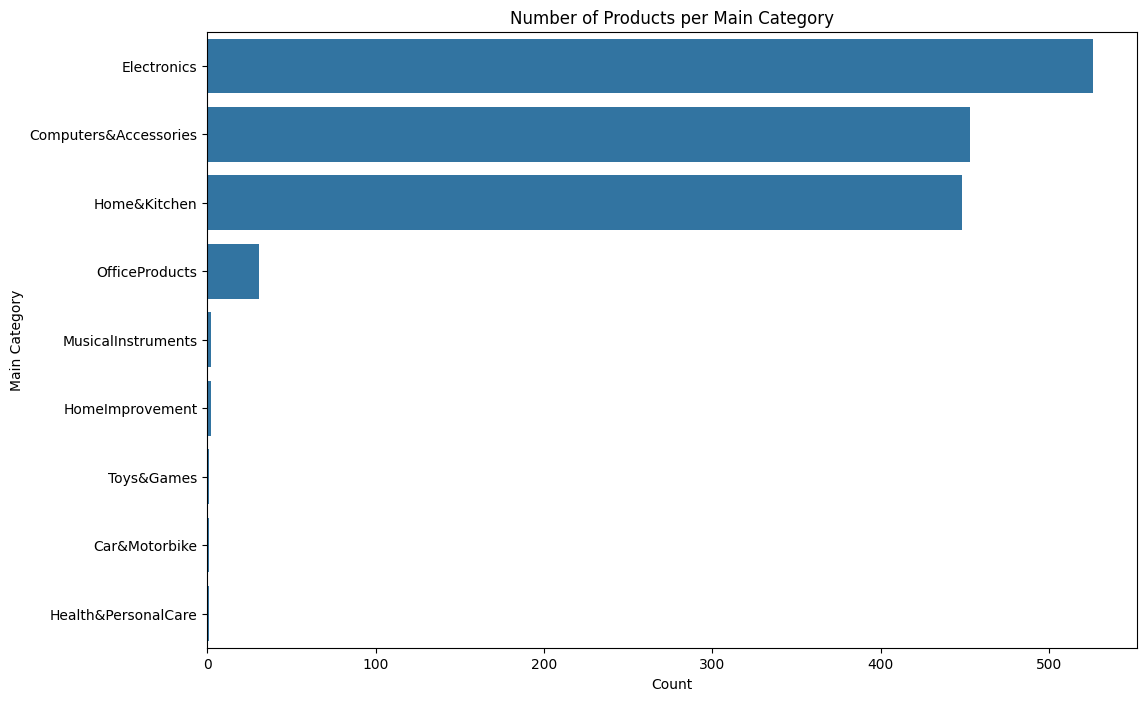


Average rating per main category:
main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


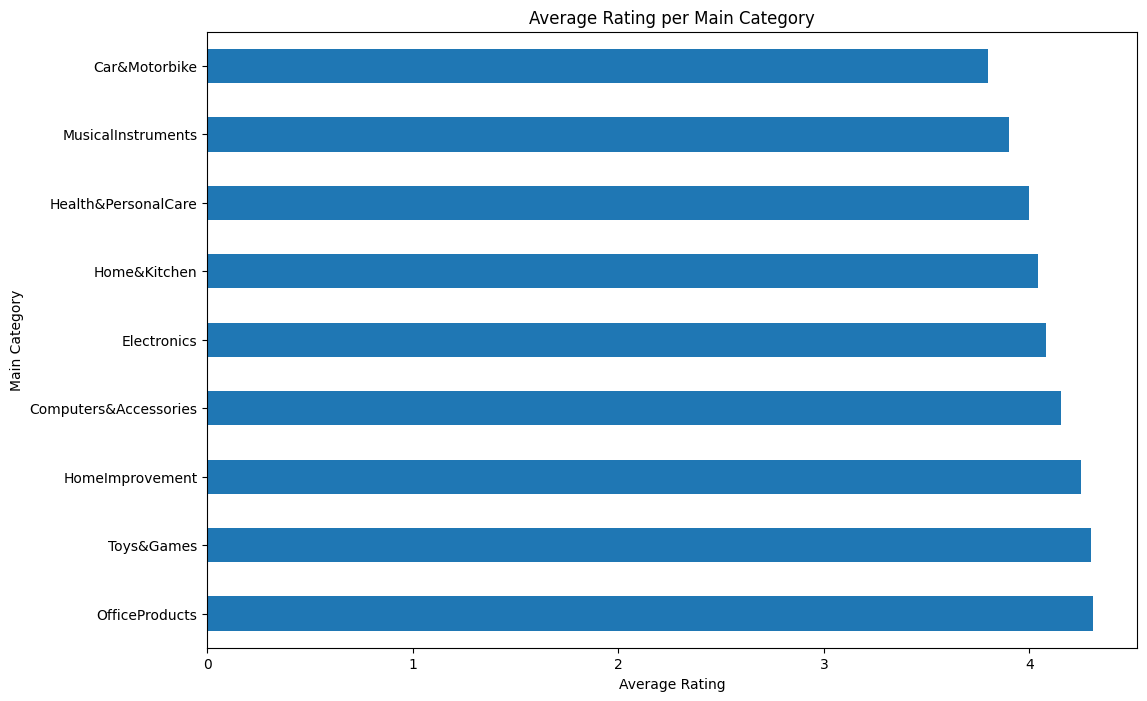


Average discounted price per main category:
main_category
Electronics              5965.887833
Car&Motorbike            2339.000000
Home&Kitchen             2330.615647
Health&PersonalCare       899.000000
Computers&Accessories     842.650375
MusicalInstruments        638.000000
HomeImprovement           337.000000
OfficeProducts            301.580645
Toys&Games                150.000000
Name: discounted_price, dtype: float64


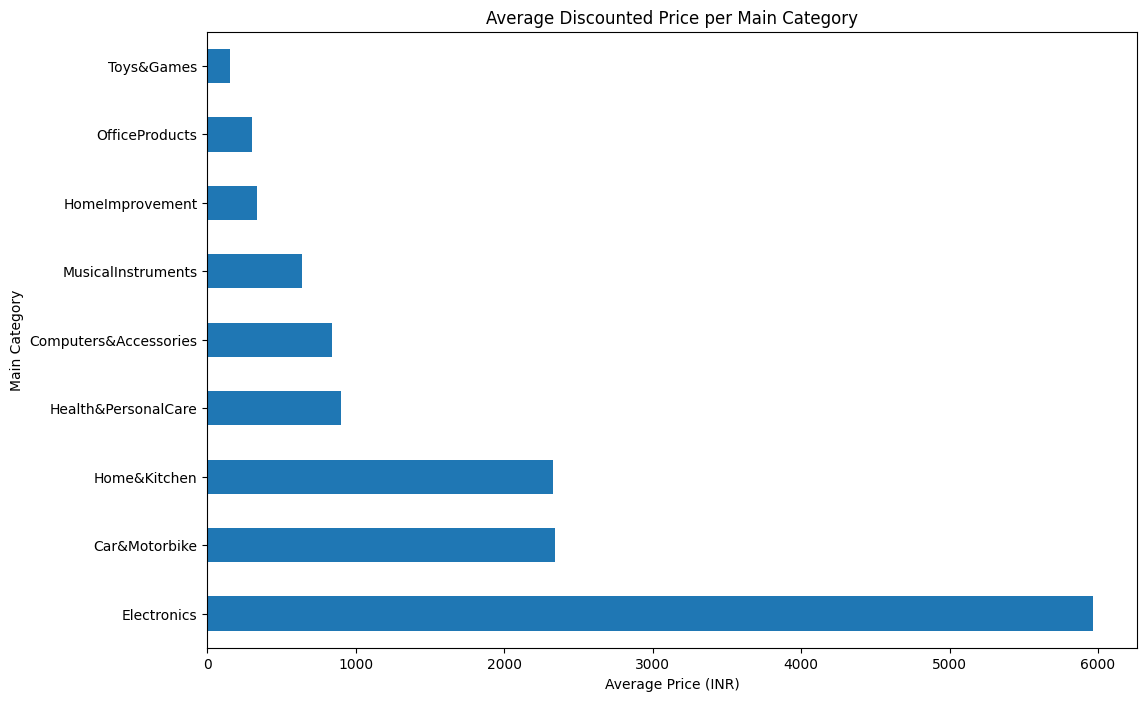

In [ ]:
if 'category' in df.columns:
    df['main_category'] = df['category'].str.split('|').str[0]
    print("\nNumber of unique main categories:", df['main_category'].nunique())

    plt.figure(figsize=(12, 8))
    sns.countplot(y='main_category', data=df.dropna(subset=['main_category']), order=df['main_category'].value_counts().index)
    plt.title('Number of Products per Main Category')
    plt.xlabel('Count')
    plt.ylabel('Main Category')
    plt.show()

    category_rating = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
    print("\nAverage rating per main category:")
    print(category_rating)

    plt.figure(figsize=(12, 8))
    category_rating.plot(kind='barh')
    plt.title('Average Rating per Main Category')
    plt.xlabel('Average Rating')
    plt.ylabel('Main Category')
    plt.show()

    category_price = df.groupby('main_category')['discounted_price'].mean().sort_values(ascending=False)
    print("\nAverage discounted price per main category:")
    print(category_price)

    plt.figure(figsize=(12, 8))
    category_price.plot(kind='barh')
    plt.title('Average Discounted Price per Main Category')
    plt.xlabel('Average Price (INR)')
    plt.ylabel('Main Category')
    plt.show()
else:
    print("Category column not found in the dataset.")